In [1]:
#Modules de travail

import os
import pandas as pd 
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

# Question 1

In [3]:
path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP1_KNN/Donnees_knn'
os.listdir(path)


['mnist_test.csv',
 '.ipynb_checkpoints',
 'synth_test.txt',
 'synth_train.txt',
 'mnist_train.csv']

In [4]:
try:
    df_train = pd.read_csv(path+'/mnist_train.csv',header=None)
    df_test = pd.read_csv(path+'/mnist_test.csv',header=None)
except FileNotFoundError:
    
    print("Mettre le dossier 'Donnees_knn' dans le répertoire de travail")

In [5]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Question 2

In [6]:
X_train = df_train.drop(columns=0,axis=1) #Donne les variables train
Y_train = df_train[0] # Donne les cibles train

X_test = df_test.drop(columns=0,axis=1)
Y_test = df_test[0]

print(f"shape train = {X_train.shape} and shape test = {X_test.shape}")

shape train = (60000, 784) and shape test = (10000, 784)


# Question 3

In [7]:
X_color_inv = 255-X_train

choisir un entier entre 0 et 59999600


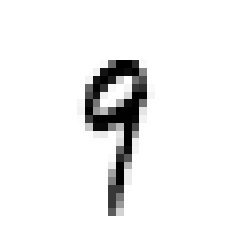

Ceci est un 9


In [8]:
i = int(input('choisir un entier entre 0 et 59999'))
plt.imshow(X_color_inv.iloc[i].values.reshape((28,28)),cmap='Greys_r') #permets de remettre sous une forme matricielle
plt.axis('off') #pas d'axe
plt.show()
print(f"Ceci est un {Y_train.iloc[i]}")


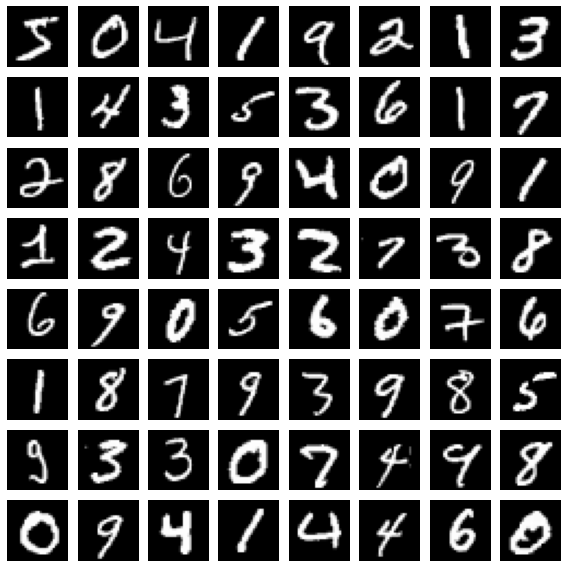

In [9]:
# Créez une figure et une grille de sous-graphiques
fig, axes = plt.subplots(8, 8, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train.iloc[i].values.reshape((28, 28)), cmap='gray')
    ax.axis('off')

# Ajustez l'espacement entre les sous-graphiques si nécessaire
plt.tight_layout(h_pad=1,w_pad=1)

# Affichez la figure
plt.show()
    
    

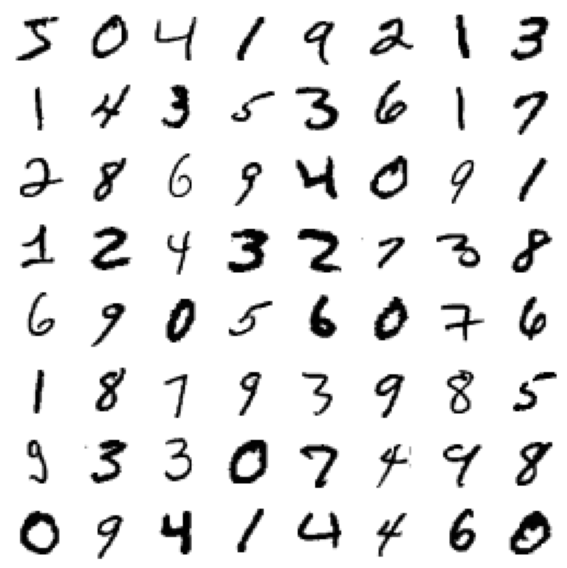

In [10]:
# Créez une figure et une grille de sous-graphiques
fig, axes = plt.subplots(8, 8, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_color_inv.iloc[i].values.reshape((28, 28)), cmap='gray')
    ax.axis('off')

# Ajustez l'espacement entre les sous-graphiques si nécessaire
plt.tight_layout(h_pad=1,w_pad=1)

# Affichez la figure
plt.show()

# Question 4

In [11]:
n = 12000
r = 500

#Avoir un aléa défini au préalable si besoin 
#npr.seed(0)

Dn = df_train.sample(n) #choisir n lignes

X = Dn.drop(columns=0,axis=1) 
Y = Dn[0]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=r/n)


In [12]:
## Vérification de la taille des classes 


E = [Y[Y==i].count() for i in Y.unique()]

print(np.array(E)/len(Y),'\n\n Les classes semblent équilibrées\n\n')

# Utilisez la fonction zip pour associer les éléments des deux listes et créez un dictionnaire
dictionnaire = dict(zip(Y.unique(), E))

print(dictionnaire)




[0.09625    0.09525    0.099      0.09858333 0.09866667 0.11275
 0.0975     0.102      0.10025    0.09975   ] 

 Les classes semblent équilibrées


{4: 1155, 5: 1143, 2: 1188, 0: 1183, 9: 1184, 1: 1353, 8: 1170, 3: 1224, 6: 1203, 7: 1197}


# Question 5 

In [31]:
n_neighbors = 10 #paramètre du nombre de voisins
knn10 = KNeighborsClassifier(n_neighbors=10,metric='euclidean') #initialiser le modèle
knn10.fit(x_train,y_train) #entrainement du modèle


KNeighborsClassifier(metric='euclidean', n_neighbors=10)

# question 6

In [32]:
#fonction de score intégrée au modèle
print(f"knn10.score(x_train,y_train) = {knn10.score(x_train,y_train)}") 
print(f"knn10.score(x_test,y_test) = {knn10.score(x_test,y_test)}")

knn10.score(x_train,y_train) = 0.9566086956521739
knn10.score(x_test,y_test) = 0.93


In [33]:
y_pred_test = knn10.predict(x_test)

taux_err = len(y_pred_test[y_pred_test != y_test])/len(y_pred_test)

print(f"Taux d'erreur de classification = {taux_err}")


Taux d'erreur de classification = 0.07


## Plusieurs fonctions pour la matrice de confusion 

Text(0.5, 1.0, 'Matrice de confusion sur les données test')

<Figure size 1800x1080 with 0 Axes>

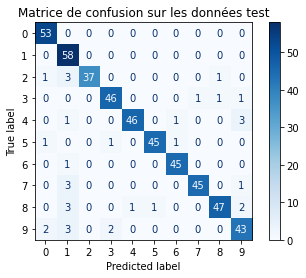

In [45]:
plt.figure(figsize=(25,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test,cmap='Blues')
plt.title('Matrice de confusion sur les données test')

Text(0.5, 1.0, 'Confusion Matrix')

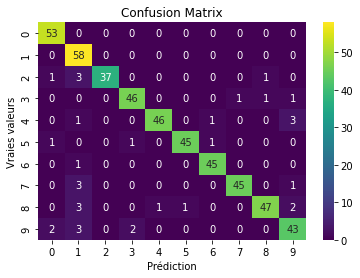

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True, fmt="d", cmap="viridis")

# Ajouter des étiquettes
plt.xlabel('Prédiction')
plt.ylabel('Vraies valeurs')
plt.title('Confusion Matrix')


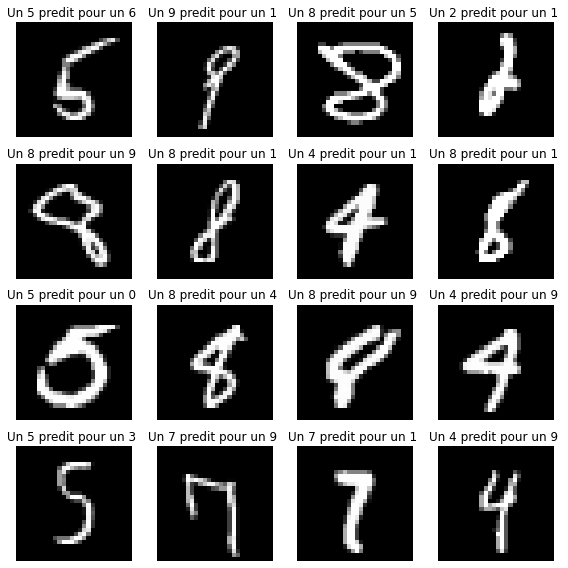

In [77]:
x_faux = x_test.loc[y_pred_test!=y_test]
y_pred_faux = y_pred_test[y_pred_test!=y_test]
y_faux = y_test.loc[y_pred_test!=y_test]


# Créez une figure et une grille de sous-graphiques
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_faux.iloc[i].values.reshape((28, 28)), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Un {y_faux.iloc[i]} predit pour un {y_pred_faux[i]} ")# {y_pred_faux[i]} 

# Ajustez l'espacement entre les sous-graphiques si nécessaire
plt.tight_layout(h_pad=1,w_pad=1)

# Affichez la figure
plt.show()

# Partie personnelle de recherche

## GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

parm_grid = {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan','nan_euclidean']}

grid = GridSearchCV(KNeighborsClassifier(),parm_grid, cv=5)
#cv pour cross validation avec 5 partitions, tournante sur 4 train et 1 pour test 
# parm_grid dico pour les tests 

grid.fit(x_train,y_train) #Clic bouton pour l'entrainement du modèle 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'nan_euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [84]:
print("Les meilleurs paramètres:\n",grid.best_params_)

model = grid.best_estimator_
print("best score  données train= ", model.score(x_train,y_train))
print("best score  données test = ", model.score(x_test,y_test))

Les meilleurs paramètres:
 {'metric': 'euclidean', 'n_neighbors': 1}
best score  données train=  1.0
best score  données test =  0.924


On peut supposer que le modèle fait de l'overfitting.

Taux d'erreur de classification = 0.076


Text(0.5, 1.0, 'Matrice de confusion sur les données test avec le meilleur modèle')

<Figure size 1800x1080 with 0 Axes>

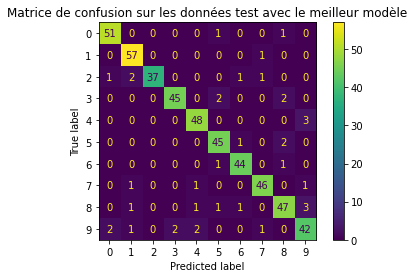

In [85]:
y_pred_test = model.predict(x_test)

taux_err = len(y_pred_test[y_pred_test != y_test])/len(y_pred_test)

print(f"Taux d'erreur de classification = {taux_err}")

plt.figure(figsize=(25,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)

plt.title('Matrice de confusion sur les données test avec le meilleur modèle')

# Et avec une ACP ?

In [112]:
n = 12000
r = 500

#Avoir un aléa défini au préalable si besoin 
npr.seed(0)

Dn = df_train.sample(n) #choisir n lignes

X = Dn.drop(columns=0,axis=1) 
Y = Dn[0]

In [113]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X= scaler.transform(X) #Pour normaliser

pca = PCA(n_components=10)
pca.fit(X)
x_pca = pca.transform(X)


In [114]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,Y,test_size=r/n)

In [115]:
from sklearn.model_selection import GridSearchCV

parm_grid = {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(),parm_grid, cv=5)
#cv pour cross validation avec 5 partitions, tournante sur 4 train et 1 pour test 
# parm_grid dico pour les tests 
grid.fit(x_train,y_train) 


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [116]:
print("Les meilleurs paramètres:\n",grid.best_params_)

model = grid.best_estimator_
print("best score  données train= ", model.score(x_train,y_train))
print("best score  données test = ", model.score(x_test,y_test))

Les meilleurs paramètres:
 {'metric': 'euclidean', 'n_neighbors': 14}
best score  données train=  0.9032173913043479
best score  données test =  0.888


Le score est moins bon mais le temps de calculs est beaucoup plus rapide. 

In [119]:

#print(f"Composantes principales :\n\n {pca.components_}\n")


print(f"\nProportions de variance expliquée :\n{pca.explained_variance_ratio_}")

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=Y)

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('ACP - Nuage de points des deux premières composantes principales')
plt.colorbar()
plt.show()



Proportions de variance expliquée :
[0.05975014 0.04229814 0.03888242 0.03069653 0.02670069 0.02289942
 0.01996315 0.01801418 0.01619088 0.01475772]


In [118]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_pca[:, 0], x_pca[:, 1],x_pca[:, 2],marker='o', c=Y)


ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')
ax.set_zlabel('Troisième composante principale')

plt.show()


Using matplotlib backend: TkAgg


La part de variance expliquée n'est pas très significative, nous sommes à moins de 23 \% de variance expliquée lorsque l'on cumule les trois premières composantes principales. Nous ne voyons pas non plus un clustering marquant des images en fonction du nombre associé.

# Et UMAP ?

In [80]:
import umap

n = 12000
r = 500

Dn = df_train.sample(n) #choisir n lignes

X = Dn.drop(columns=0,axis=1) 
Y = Dn[0]

In [81]:
reducer = umap.UMAP(n_neighbors=5, min_dist=0.01, n_components=3)
embedding = reducer.fit_transform(X)


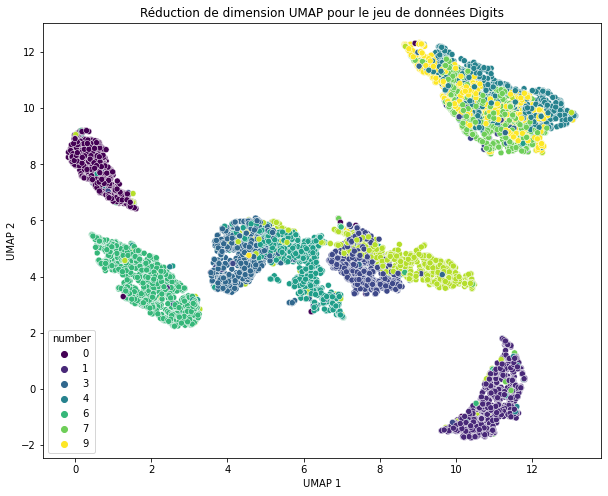

In [83]:
# Création d'un DataFrame pour la visualisation
df = pd.DataFrame({'UMAP 1': embedding[:, 0], 'UMAP 2': embedding[:, 1], 'number': Y})

# Visualisation des données réduites avec UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP 1', y='UMAP 2', hue='number', data=df, palette='viridis')
plt.title('Réduction de dimension UMAP pour le jeu de données Digits')
plt.show()

In [84]:
x_train,x_test,y_train,y_test = train_test_split(embedding,Y,test_size=r/n,random_state=0)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=r/n,random_state=0)

In [85]:
from sklearn.model_selection import GridSearchCV

parm_grid = {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(),parm_grid, cv=5)
#cv pour cross validation avec 5 partitions, tournante sur 4 train et 1 pour test 
# parm_grid dico pour les tests 
grid.fit(x_train,y_train) 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [86]:
print("Les meilleurs paramètres:\n",grid.best_params_)

model = grid.best_estimator_
print("best score  données train= ", model.score(x_train,y_train))
print("best score  données test = ", model.score(x_test,y_test))

Les meilleurs paramètres:
 {'metric': 'euclidean', 'n_neighbors': 7}
best score  données train=  0.9456521739130435
best score  données test =  0.946


In [88]:
y_pred_test = model.predict(x_test)

X_faux = X_test[y_pred_test!=y_test]

y_pred_faux = y_pred_test[y_pred_test!=y_test]
y_faux = y_test[y_pred_test!=y_test]



In [90]:
X_faux.shape

(27, 784)

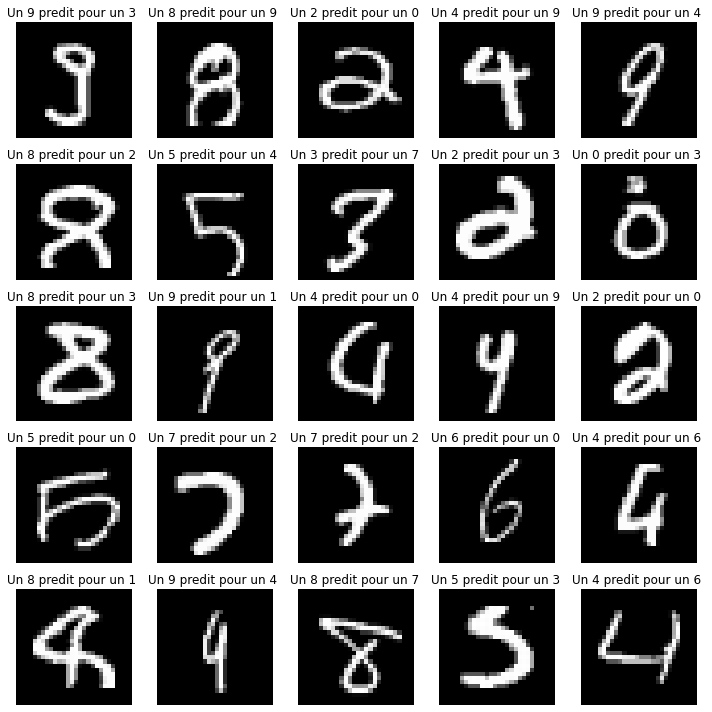

In [91]:

# Créez une figure et une grille de sous-graphiques
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_faux.iloc[i].values.reshape((28, 28)), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Un {y_faux.iloc[i]} predit pour un {y_pred_faux[i]} ")# {y_pred_faux[i]} 

# Ajustez l'espacement entre les sous-graphiques si nécessaire
plt.tight_layout(h_pad=1,w_pad=1)

# Affichez la figure
plt.show()